In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Einlesen

In [2]:
df = pd.read_csv('./data/climb_shoes.csv')

In [3]:
df.head()

,id,timestamp,street_shoe_size,fav_sneaker,foot_len,foot_width,foot_family,foot_deform,shoe_brand,shoe_model,...,rate_comfort,rate_stiffness,use_freq,climb_grade,overall_rating,gender,height,weight,age,exp
0,1,24.02.2021 22:27:44,41.5,Vans Authentic,25.5,10.0,Ägyptischer Fußtyp,Nein,La Sportiva,La Sportiva - SKWAMA,...,4,4,4,Fortgeschritten (UIAA 7 - 9),5,Männlich,168,61,29,4.0
1,2,25.02.2021 08:26:50,38.5,Adidas cloudfoam,24.2,9.8,Römischer Fußtyp,Hallux Valgus,La Sportiva,La Sportiva - SOLUTION COMP WOMAN,...,4,3,3,Fortgeschritten (UIAA 7 - 9),4,Weiblich,168,63,30,3.0
2,3,25.02.2021 10:28:25,46.0,Black Diamond Mission LT,29.0,10.0,Griechischer Fußtyp,Nein,La Sportiva,La Sportiva - SKWAMA,...,4,5,5,Fortgeschritten (UIAA 7 - 9),5,Männlich,186,72,36,30.0
3,4,25.02.2021 10:41:47,46.0,Black Diamond Mission LT,29.0,10.0,Griechischer Fußtyp,Nein,La Sportiva,La Sportiva - SKWAMA,...,4,5,5,Fortgeschritten (UIAA 7 - 9),5,Männlich,186,72,36,30.0
4,5,25.02.2021 11:35:49,42.0,Adidas Stan Smith,27.0,10.0,Römischer Fußtyp,Hallux Valgus,Tenaya,Tenaya - OASI,...,4,5,3,Anfänger (UIAA < 7),4,Männlich,178,67,33,3.0


# Allgemein

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 139 non-null    int64  
 1   timestamp          139 non-null    object 
 2   street_shoe_size   139 non-null    float64
 3   fav_sneaker        120 non-null    object 
 4   foot_len           139 non-null    float64
 5   foot_width         139 non-null    float64
 6   foot_family        139 non-null    object 
 7   foot_deform        139 non-null    object 
 8   shoe_brand         139 non-null    object 
 9   shoe_model         139 non-null    object 
 10  shoe_model_manu    3 non-null      object 
 11  climb_shoe_size    139 non-null    float64
 12  shoe_age           139 non-null    float64
 13  favourite          136 non-null    object 
 14  shoe_vorspann      139 non-null    object 
 15  shoe_downturn      139 non-null    object 
 16  shoe_asymetry      139 non

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,139.0,38.057554,23.381142,1.0,18.00,39.0,59.0,79.0
street_shoe_size,139.0,41.697842,2.822412,36.5,39.25,42.5,44.0,47.5
foot_len,139.0,25.746403,2.721044,10.2,24.50,26.0,27.3,30.5
foot_width,139.0,9.727338,0.803507,7.0,9.25,9.9,10.0,11.2
climb_shoe_size,139.0,40.542590,2.770770,29.0,38.50,41.0,42.5,46.0
shoe_age,139.0,2.005396,2.365878,0.0,1.00,1.0,2.0,22.0
rate_fit,139.0,4.187050,0.803690,2.0,4.00,4.0,5.0,5.0
rate_comfort,139.0,3.726619,1.055048,1.0,3.00,4.0,5.0,5.0
rate_stiffness,139.0,3.568345,1.097100,1.0,3.00,4.0,5.0,5.0
use_freq,139.0,3.697842,1.249085,1.0,3.00,4.0,5.0,5.0


In [6]:
df.columns

Index(['id', 'timestamp', 'street_shoe_size', 'fav_sneaker', 'foot_len',
       'foot_width', 'foot_family', 'foot_deform', 'shoe_brand', 'shoe_model',
       'shoe_model_manu', 'climb_shoe_size', 'shoe_age', 'favourite',
       'shoe_vorspann', 'shoe_downturn', 'shoe_asymetry', 'shoe_closing_type',
       'use_style', 'use_location', 'rate_fit', 'rate_comfort',
       'rate_stiffness', 'use_freq', 'climb_grade', 'overall_rating', 'gender',
       'height', 'weight', 'age', 'exp'],
      dtype='object')

In [7]:
n_ratings = len(df)
n_brands = df['shoe_brand'].nunique()
n_shoes = df['shoe_model'].nunique()
n_users = df['id'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique shoe brands: {n_brands}")
print(f"Number of unique shoe models: {n_shoes}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per shoe: {round(n_ratings/n_shoes, 2)}")

Number of ratings: 139
Number of unique shoe brands: 14
Number of unique shoe models: 64
Number of unique users: 78
Average number of ratings per user: 1.78
Average number of ratings per shoe: 2.17


# Analyse street_shoe_size

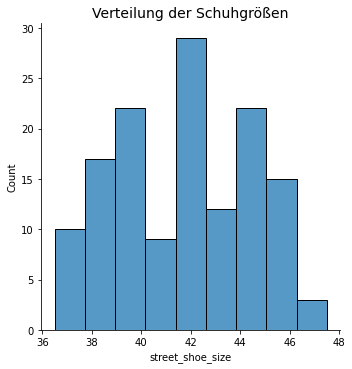

In [8]:
sns.displot(x='street_shoe_size', data=df, palette='viridis')
plt.title("Verteilung der Schuhgrößen", fontsize=14)
plt.show()

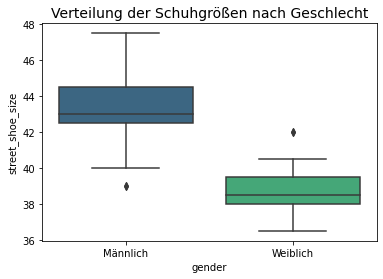

In [9]:
sns.boxplot(x='gender', y='street_shoe_size', data=df, palette='viridis')
plt.title("Verteilung der Schuhgrößen nach Geschlecht", fontsize=14)
plt.show()

# Analyse fav_sneaker

In [10]:
df['fav_sneaker'] = df['fav_sneaker'].str.lower()
n_sneaker = df['fav_sneaker'].nunique()
print(f"Number of unique sneakers: {n_sneaker}")

Number of unique sneakers: 49


In [11]:
df['fav_sneaker'].unique()

array(['vans authentic', 'adidas cloudfoam', 'black diamond mission lt',
       'adidas stan smith', 'kangaroos', nan,
       'halbschuhe von hilfiger oder boxfresh', 'vans', 'adidas / nikes',
       'puma', 'nike ', 'adidas cloudfoarm', 'merrell vapor glove 4',
       'new balance ', 'vaude', 'etnies', 'nike', 'scarpa gecko air flip',
       'five ten access', 'adidas spezial', 'vans old skool',
       'vans oldschool', 'five ten freerider', 'vans era',
       'paul green schuhe', 'vans sk8 high', 'keine 🙈', 'air force ',
       "adidas nmd's", 'keinen ;) ', 'bench ', 'adidas gazelle',
       'gieswein sneaker', 'nike air max / adidas nmd r1',
       'vans comfycush era', 'adidas ultraboost', 'nike air',
       'salomon speedcross ', 'vans sk8 hi', 'converse ', 'chucks',
       'laufschuhe von joe nimble, based on bär', 'nike janoski',
       'cloud on running', 'salewa firetail', 'adidas', 'converse chuck',
       'nike free ', 'news balance 574', 'vans, chucks'], dtype=object)

In [12]:
df['sneaker_brand'] = df['fav_sneaker'].map({
'vans authentic':'vans',
'adidas cloudfoam':'adidas',
'black diamond mission lt':'black diamond',
'adidas stan smith':'adidas',
'halbschuhe von hilfiger oder boxfresh':'hilfiger',
'vans':'vans',
'adidas / nikes' : 'adidas',
'adidas cloudfoarm':'adidas',
'merrell vapor glove 4':'merrell',
'new balance ':'new balance',
'scarpa gecko air flip':'scarpa',
'five ten access':'five ten',
'adidas spezial':'adidas',
'vans old skool':'vans',
'vans oldschool':'vans',
'five ten freerider':'five ten',
'vans era':'vans',
'paul green schuhe':'paul green',
'vans sk8 high':'vans',
'keine 🙈':'none',
'air force ':'nike',
"adidas nmd's":'adidas',
'keinen ;) ':'none',
'adidas gazelle':'adidas',
'gieswein sneaker':'gieswein',
'nike air max / adidas nmd r1':'nike',
'vans comfycush era':'vans',
'adidas ultraboost':'adidas',
'nike air':'nike',
'salomon speedcross ':'salomon',
'vans sk8 hi':'vans',
'converse ':'converse',
'chucks':'converse',
'laufschuhe von joe nimble based on bär':'joe nimble',
'nike janoski':'nike',
'salewa firetail':'salewa',
'adidas':'adidas',
'converse chuck':'converse',
'nike free ':'nike',
'news balance 574':'new balance'
})
df['sneaker_brand'].value_counts()

vans             33
adidas           16
black diamond    11
nike              9
converse          5
five ten          5
none              4
salomon           3
paul green        2
hilfiger          2
scarpa            2
new balance       2
salewa            1
gieswein          1
merrell           1
Name: sneaker_brand, dtype: int64

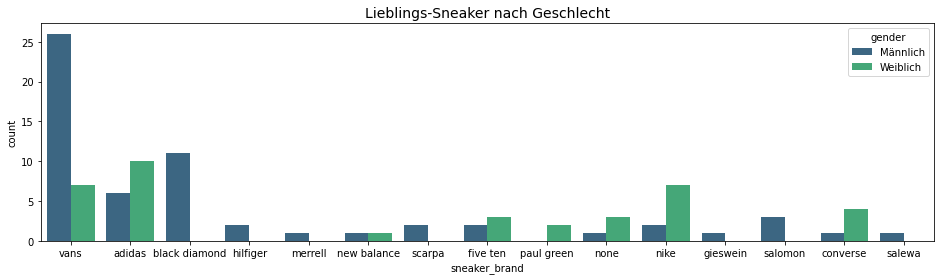

In [13]:
plt.figure(figsize=(16,4))
sns.countplot(x='sneaker_brand', data=df, hue='gender', palette='viridis')
plt.title("Lieblings-Sneaker nach Geschlecht", fontsize=14)
plt.show()

# Analyse Fuß-Eigenschaften

In [14]:
df['foot_deform'].value_counts()

Nein                                                        77
Hallux Valgus                                               13
Senkfuß                                                     11
Spreizfuß                                                    7
Plattfuß                                                     5
Plattfuß, Spreizfuß                                          3
Nein, Spreizfuß                                              3
Hallux Valgus, Senkfuß                                       2
Nein, Hallux Valgus, Senkfuß                                 2
Hallux Valgus, Hohlfuß                                       2
Hohlfuß                                                      2
Knickfuß                                                     2
Nein, abgeflachtes Quergewölbe, aber noch kein Spreizfuß     2
Plattfuß, Senkfuß                                            2
Nein, Hallux Valgus                                          2
Nein, Senkfuß                                          

In [15]:
deformations = ['Hallux Valgus', 'Senkfuß','Spreizfuß','Plattfuß', 'Hohlfuß','Knickfuß']

for deform in deformations:
    df[deform.lower().split()[0]] = df.apply(lambda row: 1 if deform in row.foot_deform.split(',') else 0, axis=1)

df.head(15)

,id,timestamp,street_shoe_size,fav_sneaker,foot_len,foot_width,foot_family,foot_deform,shoe_brand,shoe_model,...,weight,age,exp,sneaker_brand,hallux,senkfuß,spreizfuß,plattfuß,hohlfuß,knickfuß
0,1,24.02.2021 22:27:44,41.5,vans authentic,25.5,10.0,Ägyptischer Fußtyp,Nein,La Sportiva,La Sportiva - SKWAMA,...,61,29,4.0,vans,0,0,0,0,0,0
1,2,25.02.2021 08:26:50,38.5,adidas cloudfoam,24.2,9.8,Römischer Fußtyp,Hallux Valgus,La Sportiva,La Sportiva - SOLUTION COMP WOMAN,...,63,30,3.0,adidas,1,0,0,0,0,0
2,3,25.02.2021 10:28:25,46.0,black diamond mission lt,29.0,10.0,Griechischer Fußtyp,Nein,La Sportiva,La Sportiva - SKWAMA,...,72,36,30.0,black diamond,0,0,0,0,0,0
3,4,25.02.2021 10:41:47,46.0,black diamond mission lt,29.0,10.0,Griechischer Fußtyp,Nein,La Sportiva,La Sportiva - SKWAMA,...,72,36,30.0,black diamond,0,0,0,0,0,0
4,5,25.02.2021 11:35:49,42.0,adidas stan smith,27.0,10.0,Römischer Fußtyp,Hallux Valgus,Tenaya,Tenaya - OASI,...,67,33,3.0,adidas,1,0,0,0,0,0
5,6,25.02.2021 15:33:44,44.0,adidas stan smith,27.2,11.0,Ägyptischer Fußtyp,Spreizfuß,Ocun,Ocun - OZONE QC,...,67,29,2.0,adidas,0,0,1,0,0,0
6,7,25.02.2021 17:41:00,43.0,kangaroos,26.5,10.5,Griechischer Fußtyp,Hallux Valgus,La Sportiva,La Sportiva - MYTHOS ECO,...,68,26,10.0,NaN,1,0,0,0,0,0
7,8,25.02.2021 17:58:12,42.0,NaN,25.0,9.5,Ägyptischer Fußtyp,Nein,Ocun,Ocun - PEARL,...,60,28,12.0,NaN,0,0,0,0,0,0
8,9,25.02.2021 18:57:55,41.0,halbschuhe von hilfiger oder boxfresh,26.0,10.5,Ägyptischer Fußtyp,Nein,La Sportiva,La Sportiva - MIURA,...,65,31,11.0,hilfiger,0,0,0,0,0,0
9,10,25.02.2021 19:43:14,43.5,vans,29.0,10.0,Ägyptischer Fußtyp,"Nein, Spreizfuß",Five Ten,Five Ten - HIANGLE,...,79,29,7.0,vans,0,0,0,0,0,0


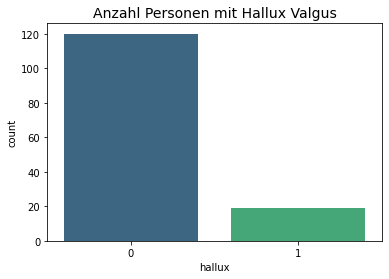

In [16]:
sns.countplot(x='hallux',data=df,palette='viridis')
plt.title("Anzahl Personen mit Hallux Valgus", fontsize=14)
plt.show()

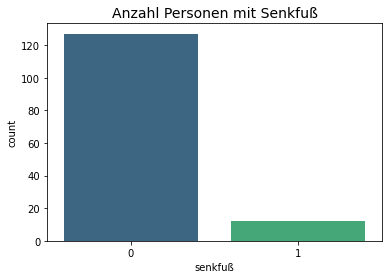

In [17]:
sns.countplot(x='senkfuß',data=df,palette='viridis')
plt.title("Anzahl Personen mit Senkfuß", fontsize=14)
plt.show()

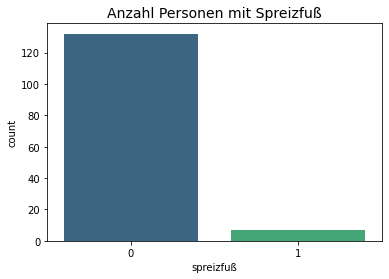

In [18]:
sns.countplot(x='spreizfuß',data=df,palette='viridis')
plt.title("Anzahl Personen mit Spreizfuß", fontsize=14)
plt.show()

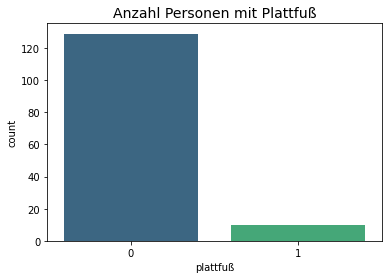

In [19]:
sns.countplot(x='plattfuß',data=df,palette='viridis')
plt.title("Anzahl Personen mit Plattfuß", fontsize=14)
plt.show()

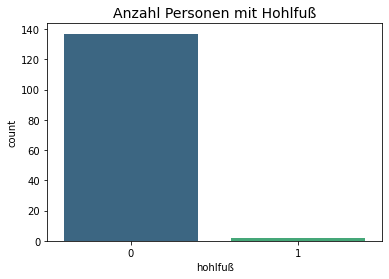

In [20]:
sns.countplot(x='hohlfuß',data=df,palette='viridis')
plt.title("Anzahl Personen mit Hohlfuß", fontsize=14)
plt.show()

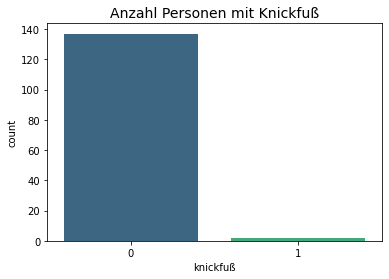

In [21]:
sns.countplot(x='knickfuß',data=df,palette='viridis')
plt.title("Anzahl Personen mit Knickfuß", fontsize=14)
plt.show()

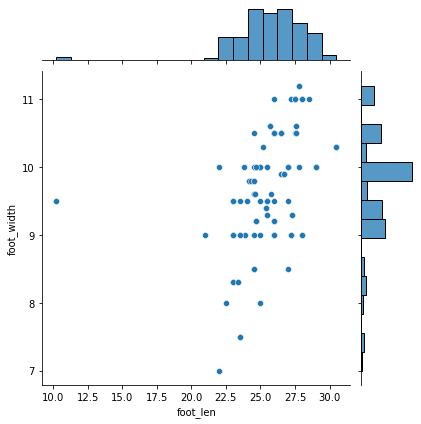

In [22]:
sns.jointplot(x='foot_len', y='foot_width', data=df, palette='viridis')
#plt.title("Fußlänge zu Fußbreite", fontsize=14)
plt.show()

In [44]:
df['foot_family'].value_counts()

Ägyptischer Fußtyp     63
Römischer Fußtyp       41
Griechischer Fußtyp    35
Name: foot_family, dtype: int64

In [45]:
df['foot_family'] = df.apply(lambda row: 'Ägyptischer Fußtyp' if row.foot_family == 'Mix aus Römisch und Ägyptisch' else row.foot_family, axis=1)
df['foot_family'].value_counts()

Ägyptischer Fußtyp     63
Römischer Fußtyp       41
Griechischer Fußtyp    35
Name: foot_family, dtype: int64

In [48]:
foot_fam = ['Ägyptischer Fußtyp', 'Römischer Fußtyp','Griechischer Fußtyp']

for foot in foot_fam:
    df[foot.lower().split()[0]] = df.apply(lambda row: 1 if foot in row.foot_family.split(',') else 0, axis=1)

df.head(3)

,id,timestamp,street_shoe_size,fav_sneaker,foot_len,foot_width,foot_family,foot_deform,shoe_brand,shoe_model,...,sneaker_brand,hallux,senkfuß,spreizfuß,plattfuß,hohlfuß,knickfuß,ägyptischer,römischer,griechischer
0,1,24.02.2021 22:27:44,41.5,vans authentic,25.5,10.0,Ägyptischer Fußtyp,Nein,La Sportiva,La Sportiva - SKWAMA,...,vans,0,0,0,0,0,0,1,0,0
1,2,25.02.2021 08:26:50,38.5,adidas cloudfoam,24.2,9.8,Römischer Fußtyp,Hallux Valgus,La Sportiva,La Sportiva - SOLUTION COMP WOMAN,...,adidas,1,0,0,0,0,0,0,1,0
2,3,25.02.2021 10:28:25,46.0,black diamond mission lt,29.0,10.0,Griechischer Fußtyp,Nein,La Sportiva,La Sportiva - SKWAMA,...,black diamond,0,0,0,0,0,0,0,0,1


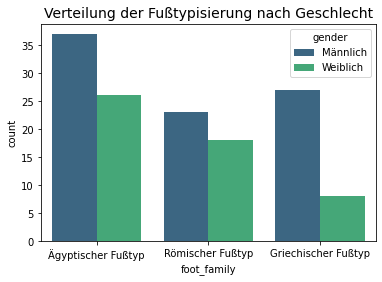

In [50]:
sns.countplot(x='foot_family', data=df, hue='gender', palette='viridis')
plt.title("Verteilung der Fußtypisierung nach Geschlecht", fontsize=14)
plt.show()

# Analyse der Schuh-Ratings

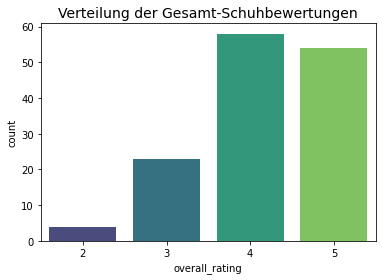

Mean global rating: 4.17.
Mean rating per user: 4.18.


In [25]:
sns.countplot(x='overall_rating',data=df,palette='viridis')
plt.title("Verteilung der Gesamt-Schuhbewertungen", fontsize=14)
plt.show()

print(f"Mean global rating: {round(df['overall_rating'].mean(),2)}.")
mean_ratings = df.groupby('id')['overall_rating'].mean()
print(f"Mean rating per user: {round(mean_ratings.mean(),2)}.")

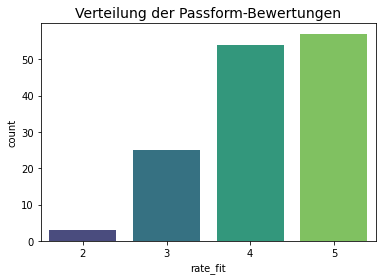

In [26]:
sns.countplot(x='rate_fit',data=df,palette='viridis')
plt.title("Verteilung der Passform-Bewertungen", fontsize=14)
plt.show()

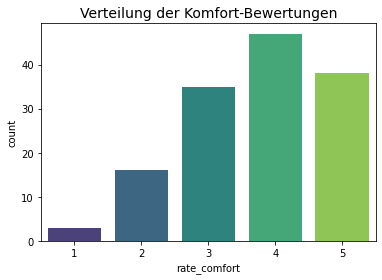

In [27]:
sns.countplot(x='rate_comfort',data=df,palette='viridis')
plt.title("Verteilung der Komfort-Bewertungen", fontsize=14)
plt.show()


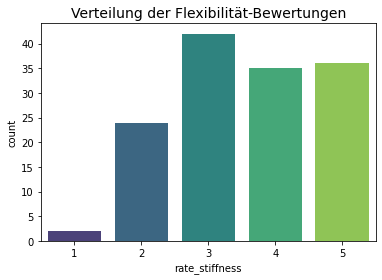

In [28]:
sns.countplot(x='rate_stiffness',data=df,palette='viridis')
plt.title("Verteilung der Flexibilität-Bewertungen", fontsize=14)
plt.show()

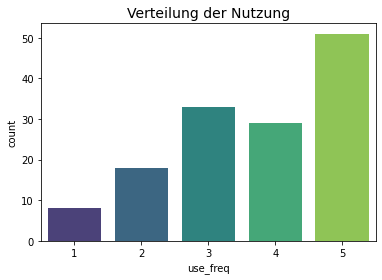

In [29]:
sns.countplot(x='use_freq',data=df,palette='viridis')
plt.title("Verteilung der Nutzung", fontsize=14)
plt.show()

In [30]:
df.isnull().sum()

id                     0
timestamp              0
street_shoe_size       0
fav_sneaker           19
foot_len               0
foot_width             0
foot_family            0
foot_deform            0
shoe_brand             0
shoe_model             0
shoe_model_manu      136
climb_shoe_size        0
shoe_age               0
favourite              3
shoe_vorspann          0
shoe_downturn          0
shoe_asymetry          0
shoe_closing_type      0
use_style              0
use_location           0
rate_fit               0
rate_comfort           0
rate_stiffness         0
use_freq               0
climb_grade            0
overall_rating         0
gender                 0
height                 0
weight                 0
age                    0
exp                    0
sneaker_brand         42
hallux                 0
senkfuß                0
spreizfuß              0
plattfuß               0
hohlfuß                0
knickfuß               0
dtype: int64

In [31]:
df.groupby('shoe_model')['shoe_model'].count().sort_values(ascending=False).head(10)

shoe_model
La Sportiva - SKWAMA            10
Ocun - OZONE QC                  8
Scarpa - VAPOR V                 8
Sonstige                         7
La Sportiva - OTAKI              5
Five Ten - HIANGLE               5
Scarpa - DRAGO                   5
La Sportiva - SOLUTION WOMAN     4
Scarpa - INSTINCT VS             4
La Sportiva - MYTHOS ECO         3
Name: shoe_model, dtype: int64

In [32]:
df = df.drop('shoe_model_manu', axis=1)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 139 non-null    int64  
 1   timestamp          139 non-null    object 
 2   street_shoe_size   139 non-null    float64
 3   fav_sneaker        120 non-null    object 
 4   foot_len           139 non-null    float64
 5   foot_width         139 non-null    float64
 6   foot_family        139 non-null    object 
 7   foot_deform        139 non-null    object 
 8   shoe_brand         139 non-null    object 
 9   shoe_model         139 non-null    object 
 10  climb_shoe_size    139 non-null    float64
 11  shoe_age           139 non-null    float64
 12  favourite          136 non-null    object 
 13  shoe_vorspann      139 non-null    object 
 14  shoe_downturn      139 non-null    object 
 15  shoe_asymetry      139 non-null    object 
 16  shoe_closing_type  139 non

C:\Users\steff\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


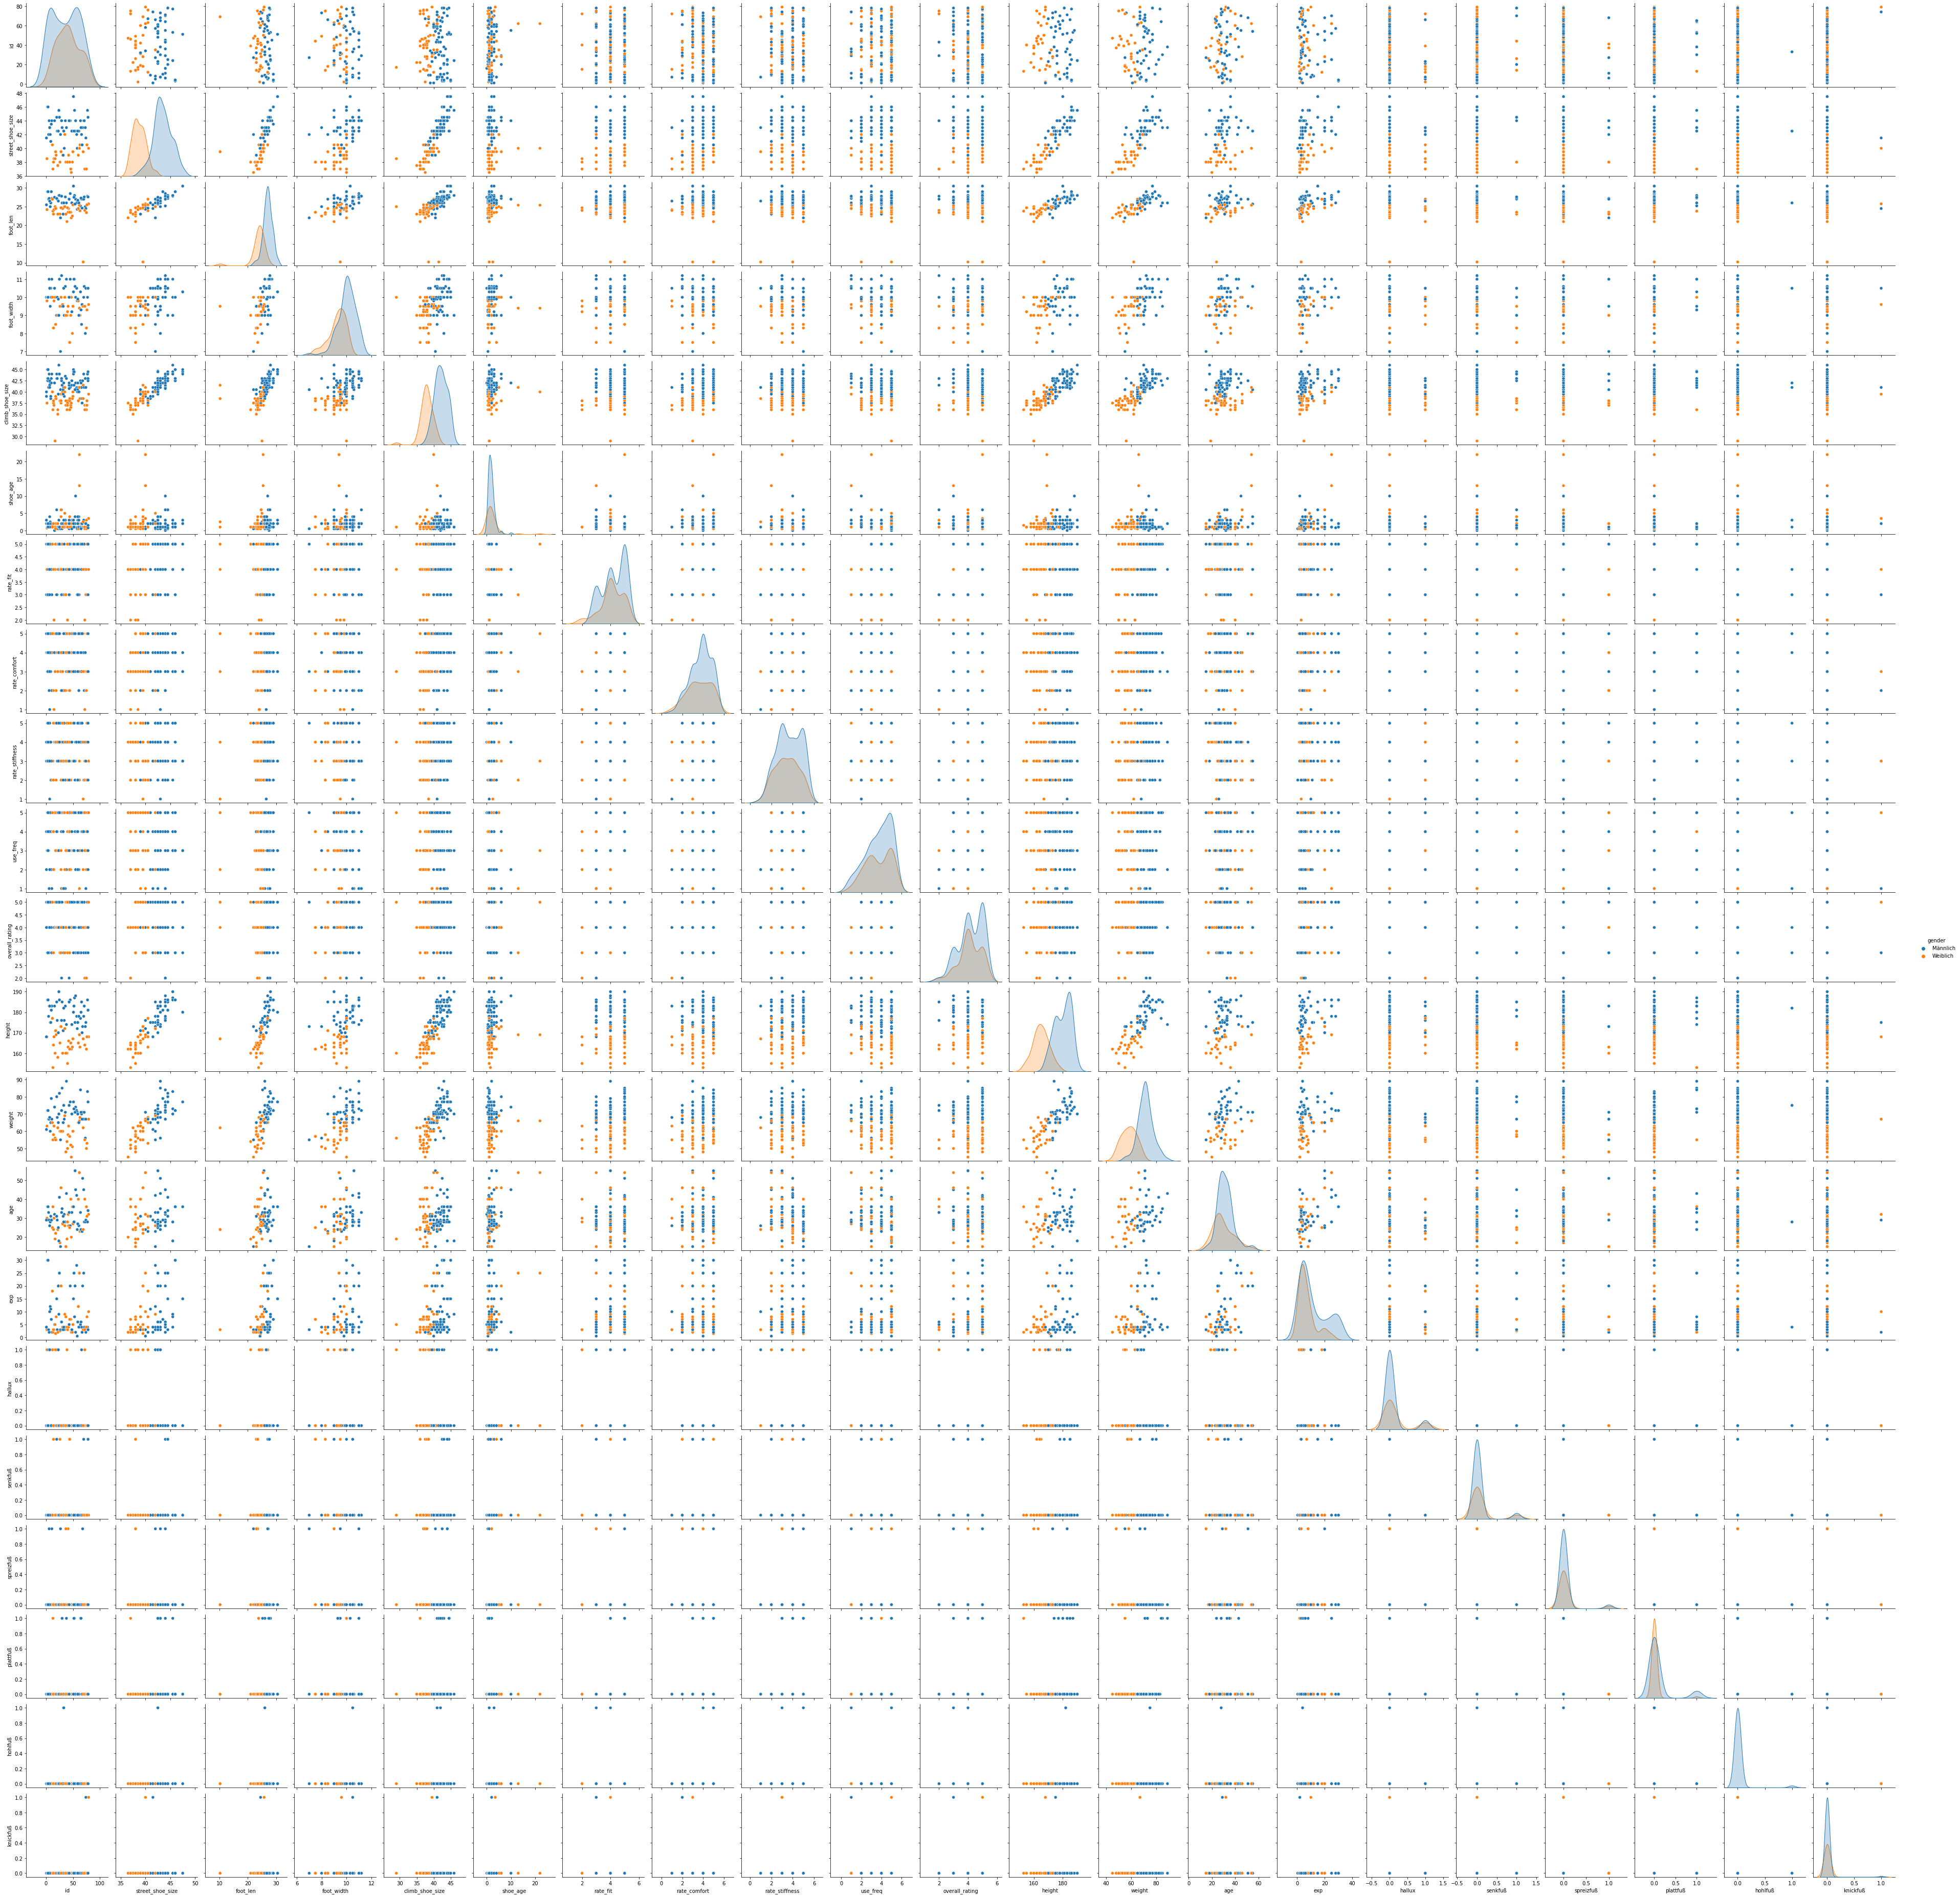

In [34]:
sns.pairplot(data=df,hue='gender')

<AxesSubplot:xlabel='gender', ylabel='count'>

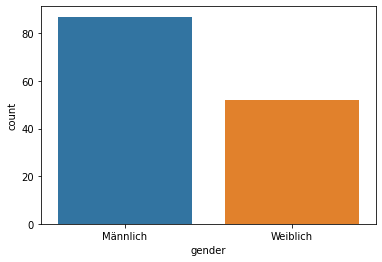

In [35]:
sns.countplot(x='gender',data=df)

<AxesSubplot:xlabel='gender', ylabel='climb_shoe_size'>

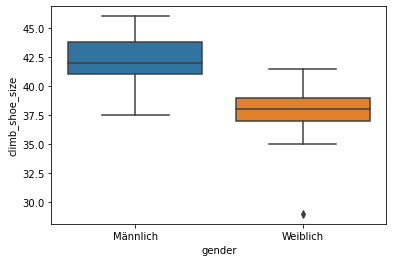

In [36]:
sns.boxplot(x='gender', y='climb_shoe_size',data=df)

<AxesSubplot:xlabel='gender', ylabel='street_shoe_size'>

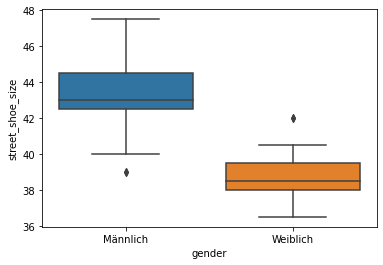

In [37]:
sns.boxplot(x='gender', y='street_shoe_size',data=df)

In [38]:
df.groupby('shoe_model')[['street_shoe_size','climb_shoe_size']].mean()

,street_shoe_size,climb_shoe_size
shoe_model,,
AMP,39.000000,38.000000
Black Diamond - ASPECT,39.000000,40.000000
Diamond,40.000000,40.000000
Evolv - DEFY LACE,41.500000,41.000000
Five Ten - DRAGON VCS,45.500000,46.000000
...,...,...
Tenaya - IATI,38.000000,37.000000
Tenaya - MASTIA,44.000000,40.750000
Tenaya - MUNDAKA,42.000000,40.500000


<AxesSubplot:xlabel='shoe_brand', ylabel='count'>

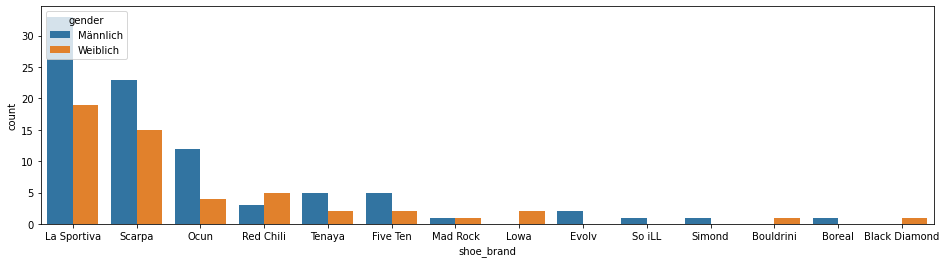

In [39]:
plt.figure(figsize=(16,4))
sort_brands = df.groupby('shoe_brand')['shoe_brand'].count().sort_values(ascending=False).index.tolist()
sns.countplot(x='shoe_brand',data=df,hue='gender', order=sort_brands)

In [40]:
df['foot_deform'].value_counts()
#df.groupby('foot_deform')['foot_deform'].count().sort_values(ascending=False).head()

Nein                                                        77
Hallux Valgus                                               13
Senkfuß                                                     11
Spreizfuß                                                    7
Plattfuß                                                     5
Plattfuß, Spreizfuß                                          3
Nein, Spreizfuß                                              3
Hallux Valgus, Senkfuß                                       2
Nein, Hallux Valgus, Senkfuß                                 2
Hallux Valgus, Hohlfuß                                       2
Hohlfuß                                                      2
Knickfuß                                                     2
Nein, abgeflachtes Quergewölbe, aber noch kein Spreizfuß     2
Plattfuß, Senkfuß                                            2
Nein, Hallux Valgus                                          2
Nein, Senkfuß                                          

<AxesSubplot:xlabel='foot_deform', ylabel='count'>

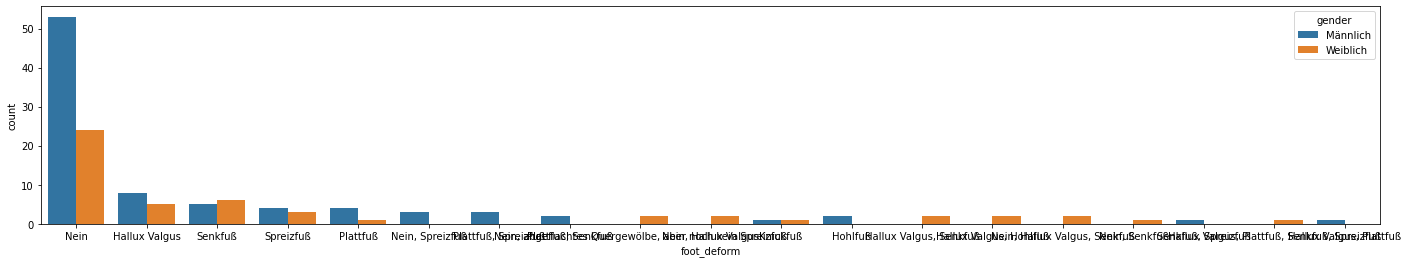

In [41]:
plt.figure(figsize=(24,4))
sort_brands = df.groupby('foot_deform')['foot_deform'].count().sort_values(ascending=False).index.tolist()
sns.countplot(x='foot_deform',data=df,hue='gender', order=sort_brands)